In [1]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 10.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 11.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 10.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 10.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [4]:
pip install scikeras

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.1 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Data Exploration and Preprocessing

In [6]:
alphabet = pd.read_csv("/Users/utkarshhajare/DS material/Assignements/Neural networks/Alphabets_data.csv")
alphabet

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


### Summarize key features

In [8]:
print("Dataset Shape:", alphabet.shape)

Dataset Shape: (20000, 17)


In [9]:
print("\nNumber of Samples:", alphabet.shape[0])


Number of Samples: 20000


In [10]:
print("Number of Features:", alphabet.shape[1] - 1)  # Exclude target column

Number of Features: 16


In [11]:
print("Number of Classes:", alphabet['letter'].nunique())

Number of Classes: 26


In [12]:
print("\nClass Distribution:\n", alphabet['letter'].value_counts())


Class Distribution:
 letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64


### Check for missing values

In [14]:
print("\nMissing Values:\n", alphabet.isnull().sum())


Missing Values:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


### Encode target variable (letter)

In [16]:
le = LabelEncoder()
alphabet['letter'] = le.fit_transform(alphabet['letter'])

### Split features and target

In [17]:
X = alphabet.drop('letter', axis=1)
y = alphabet['letter']

### Normalize features

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split into training and test sets (80% train, 20% test)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Visualize feature distribution

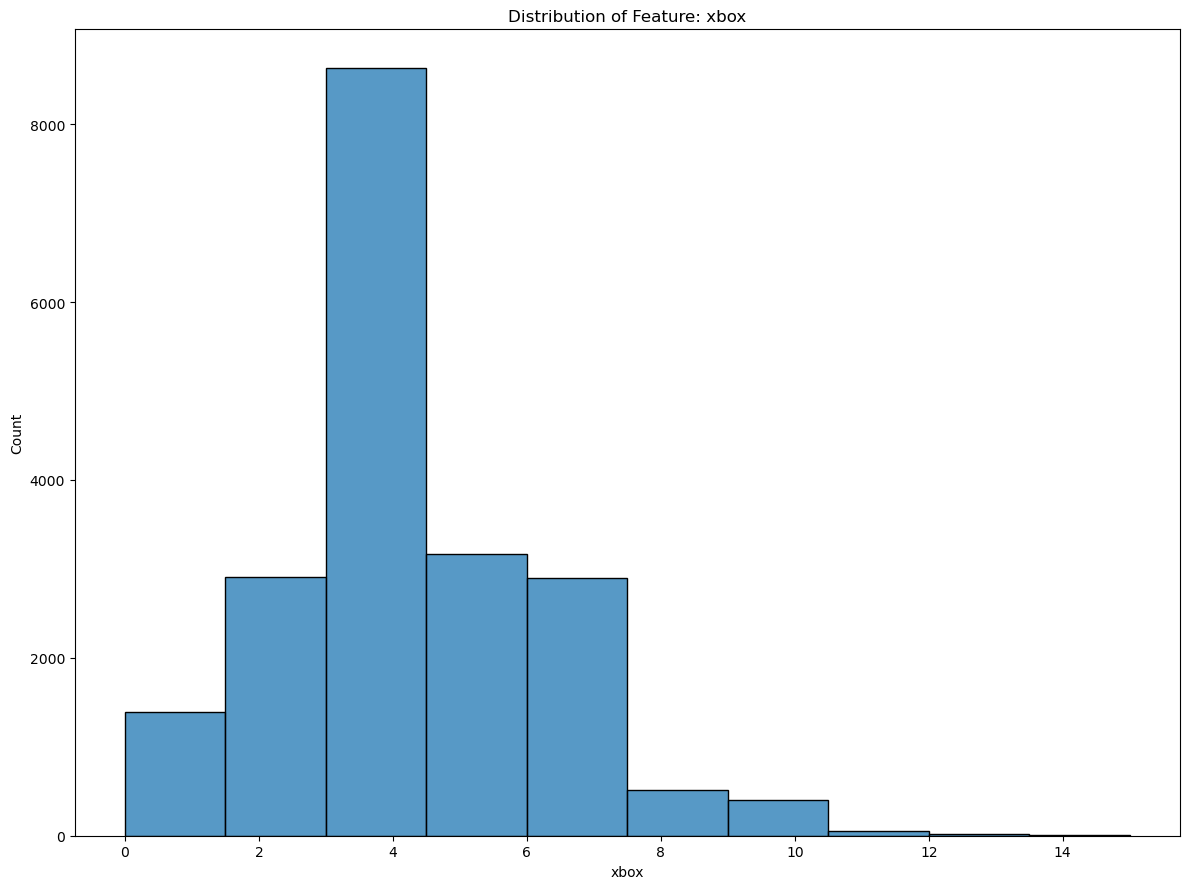

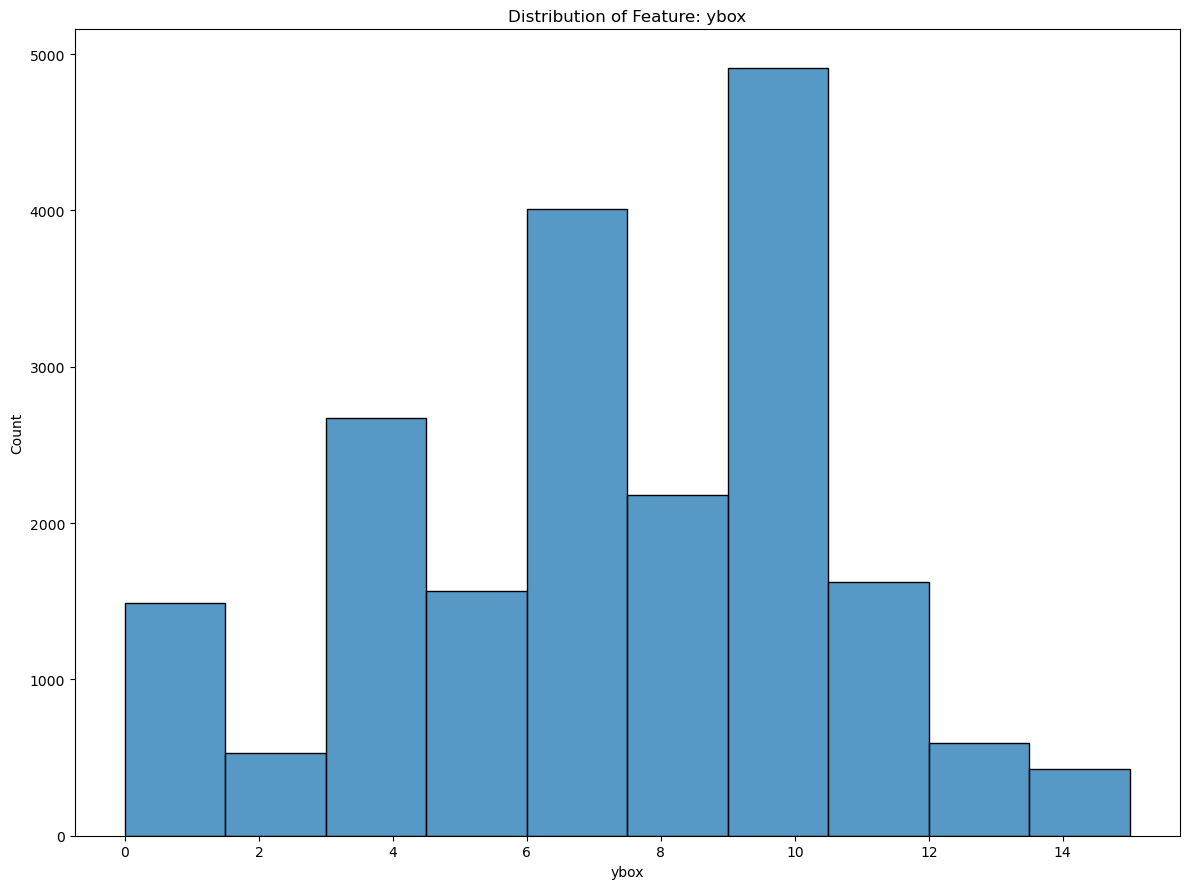

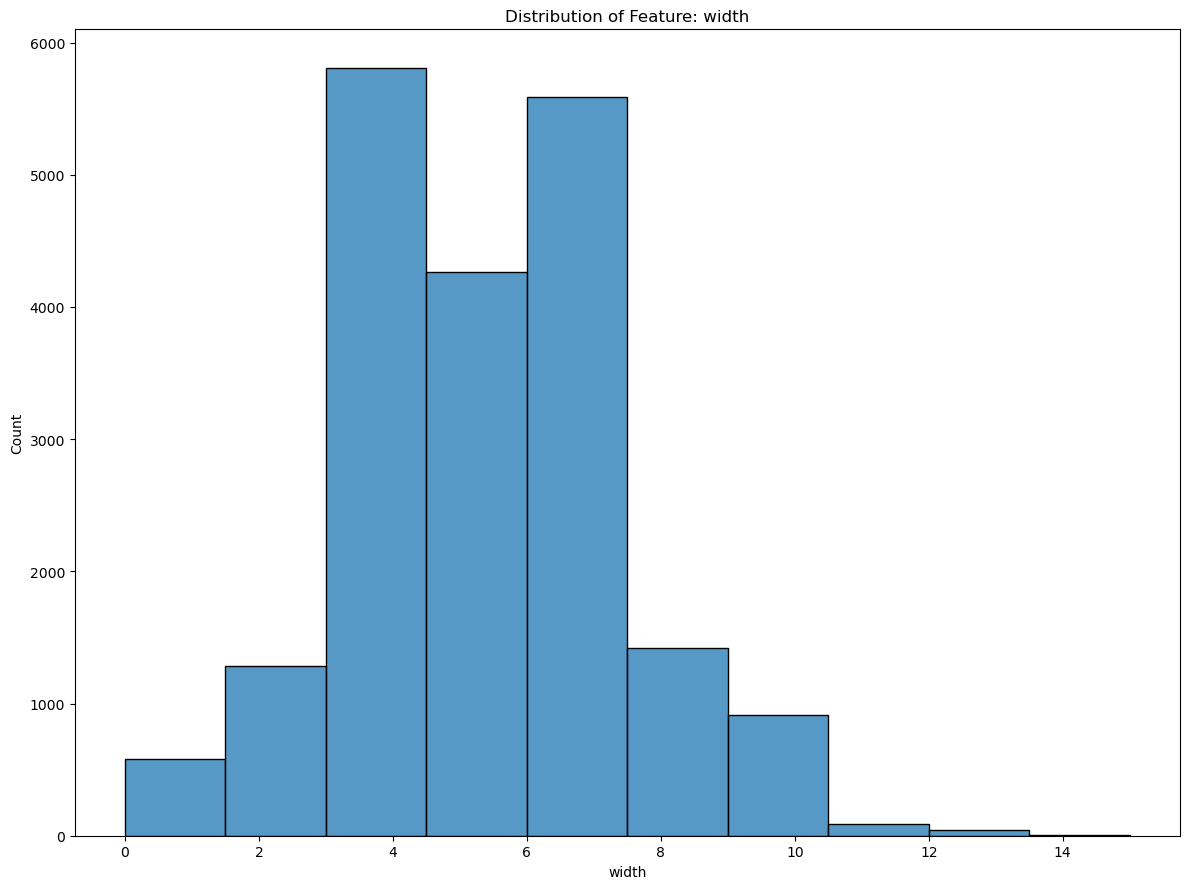

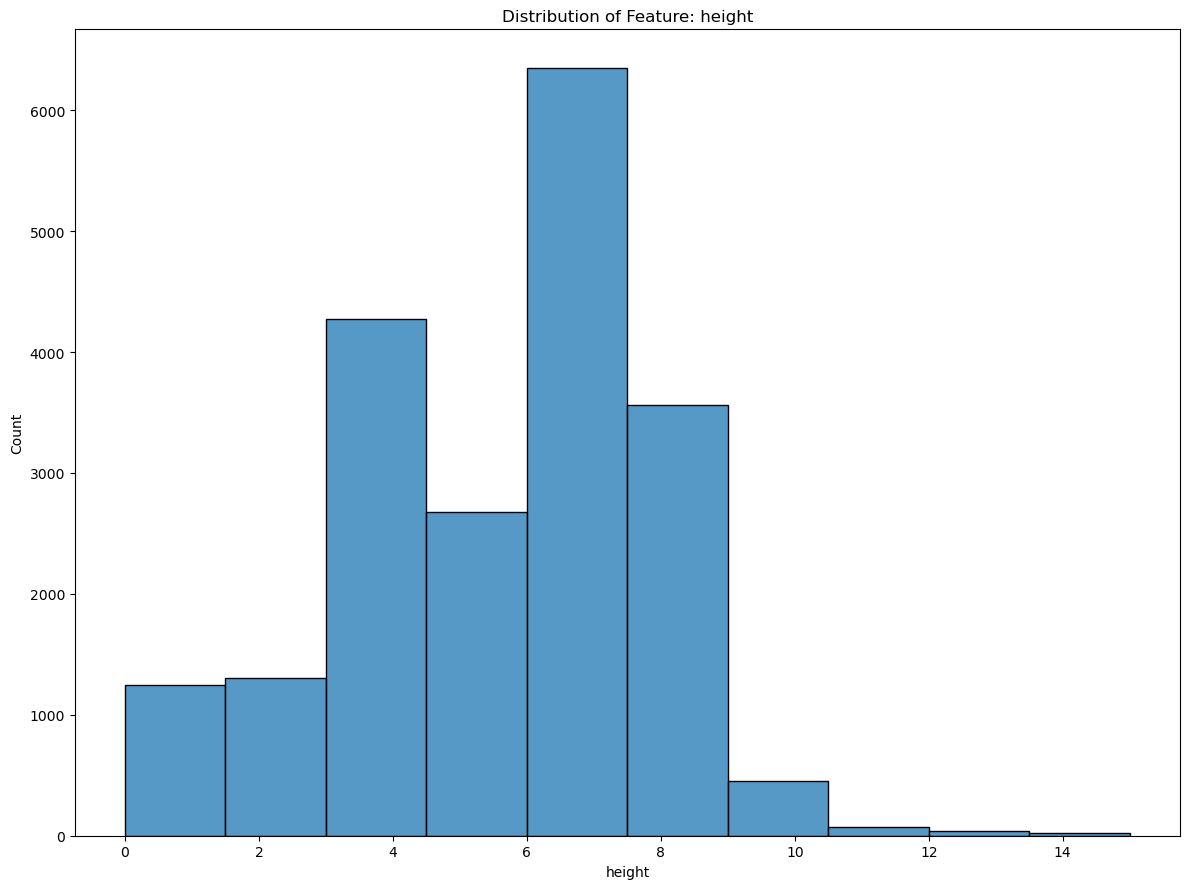

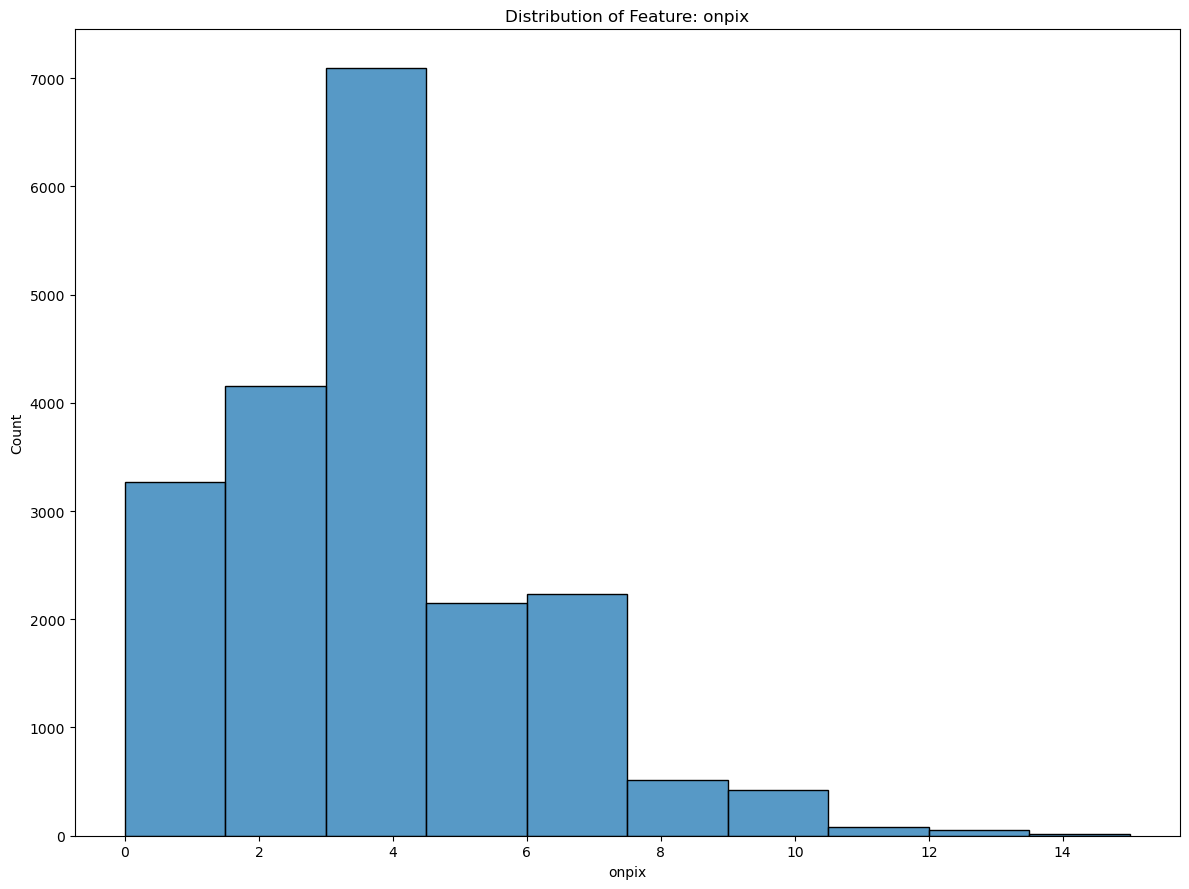

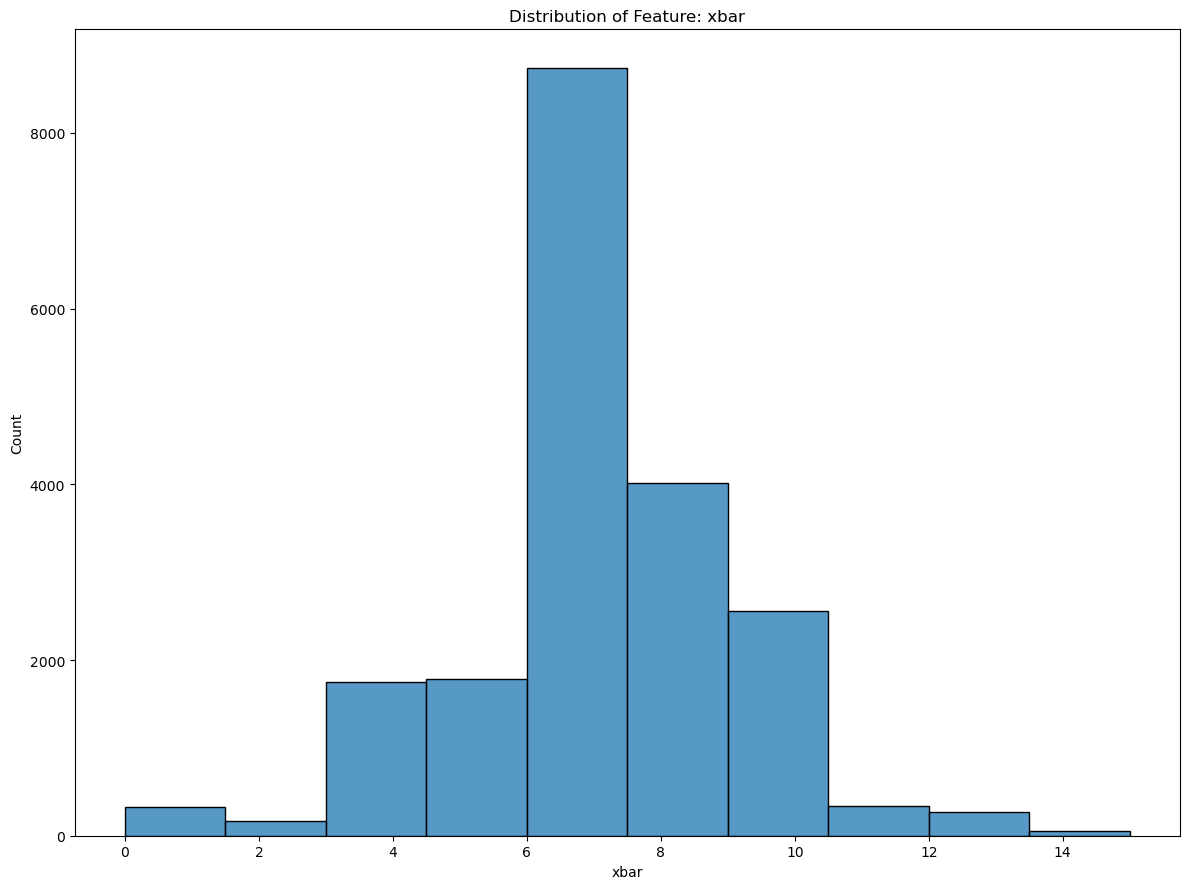

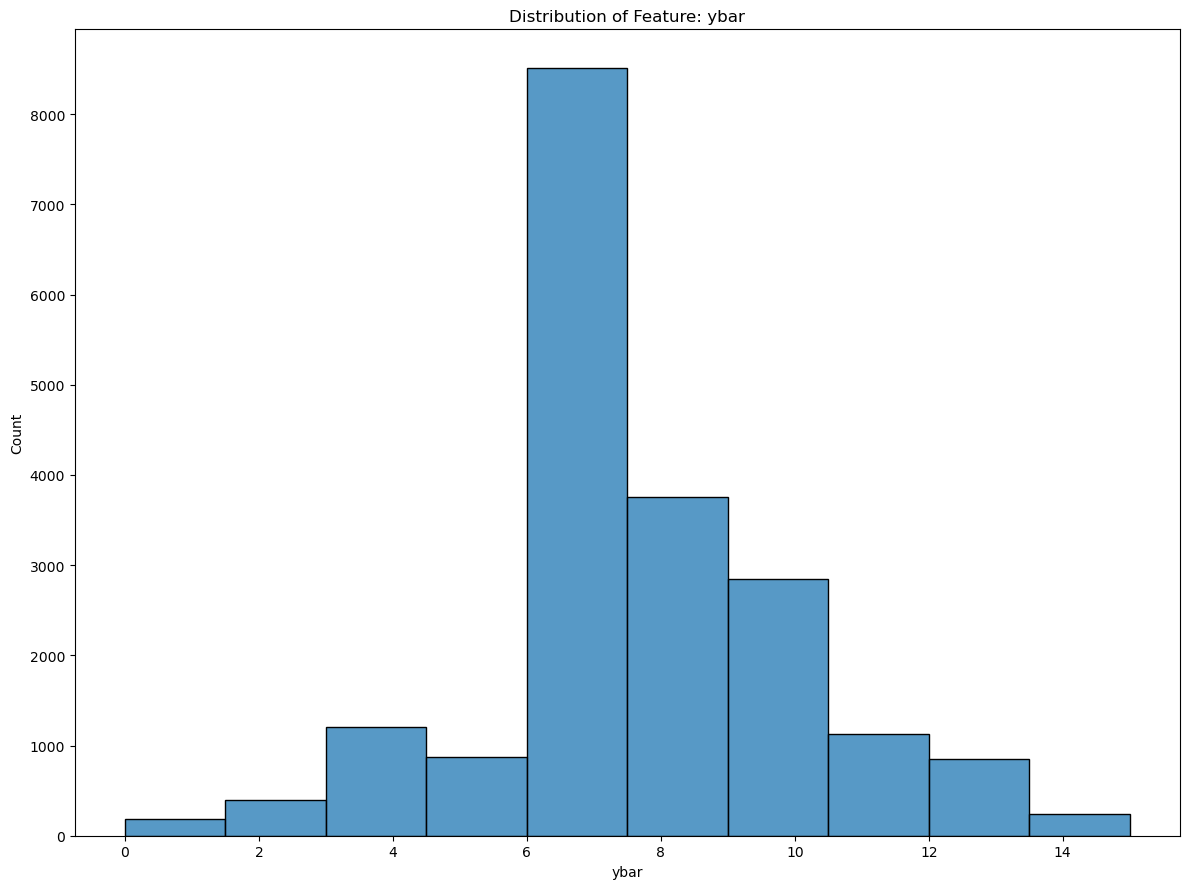

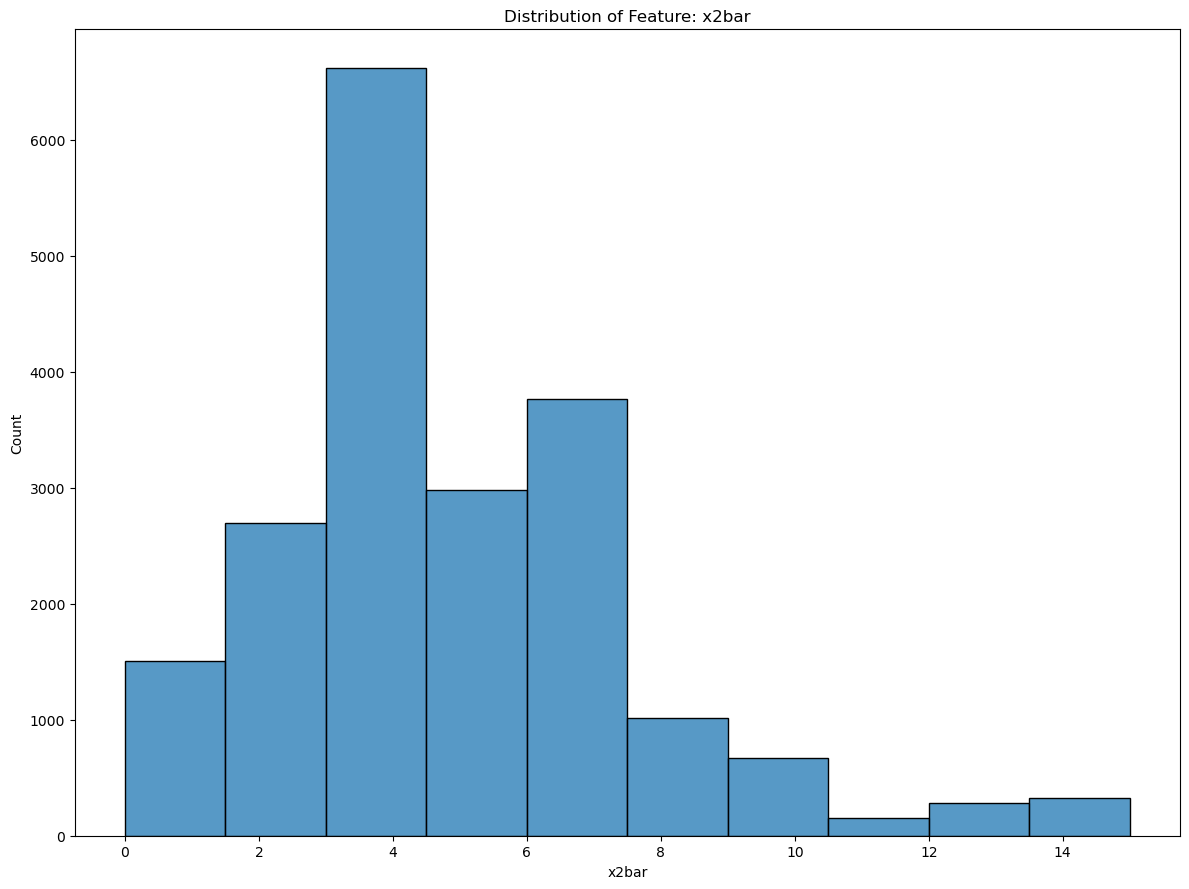

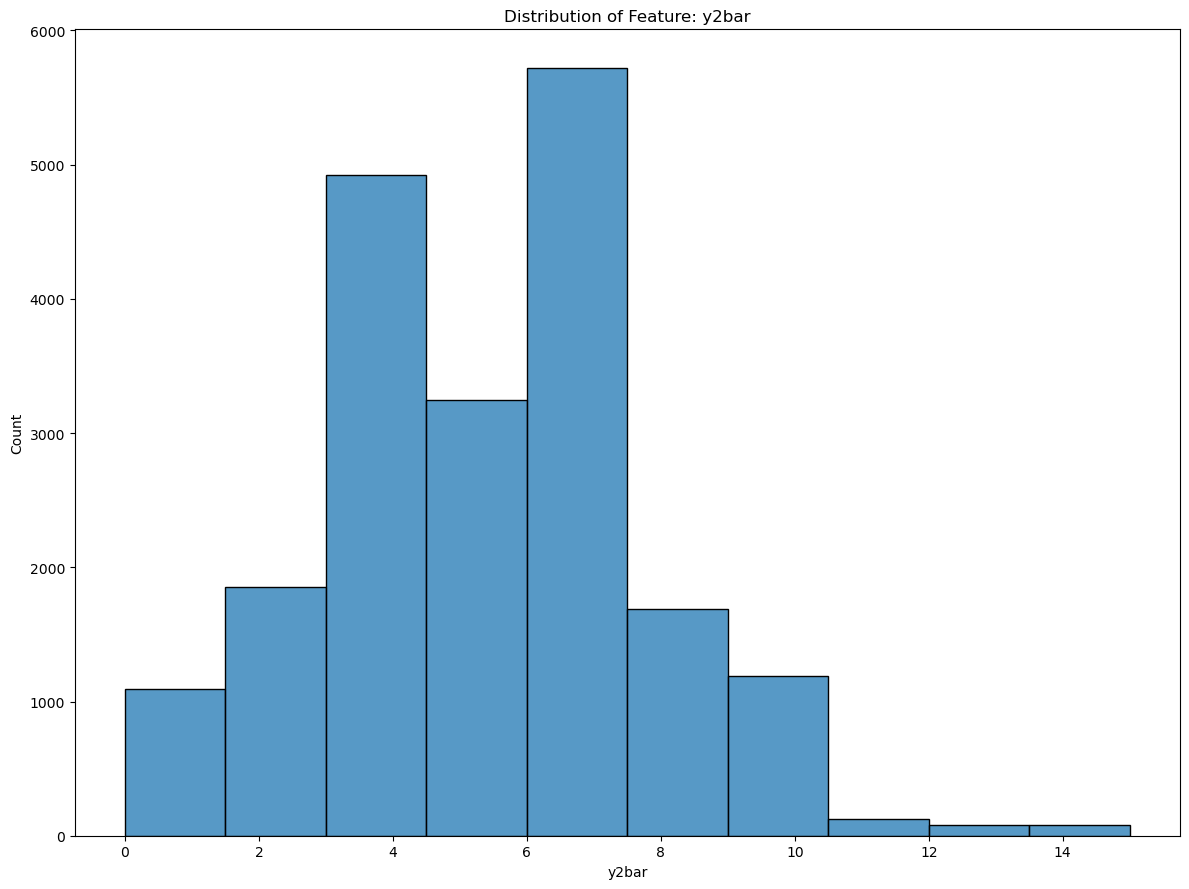

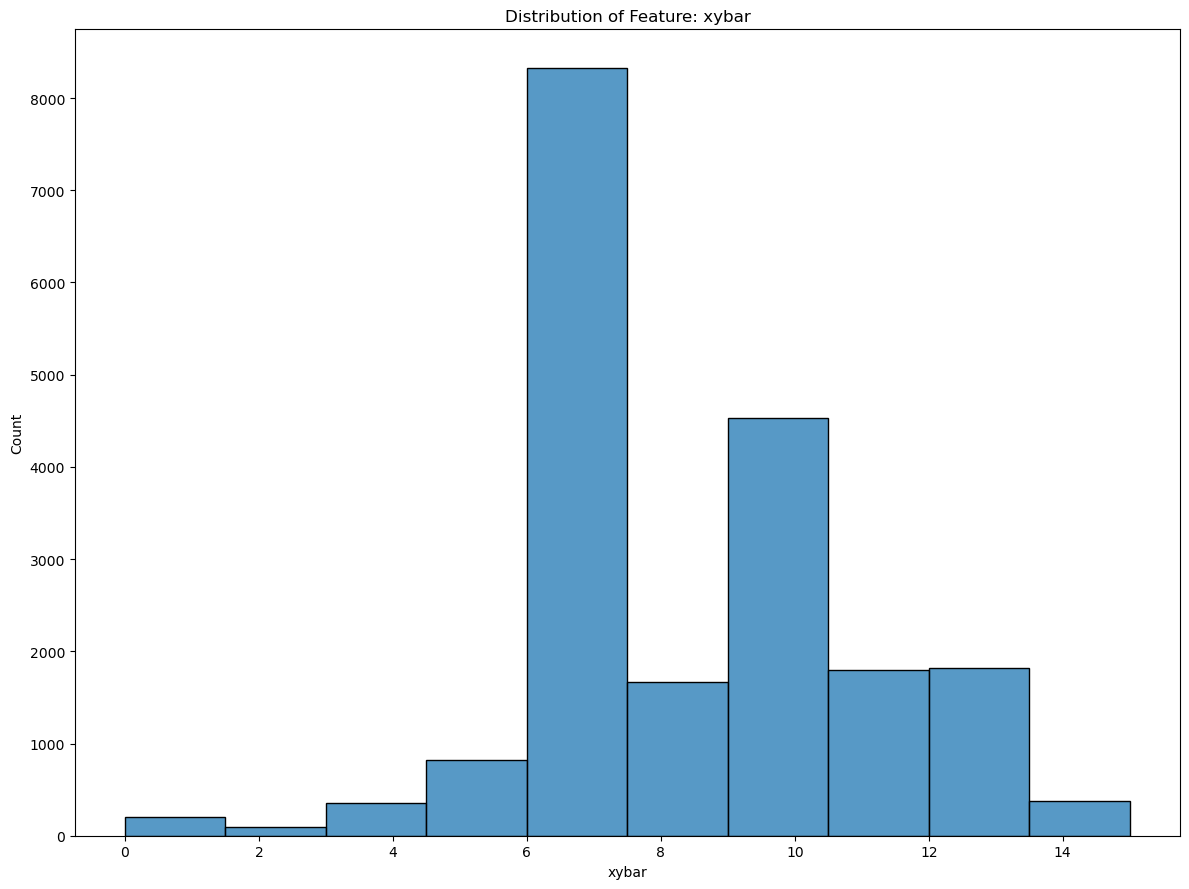

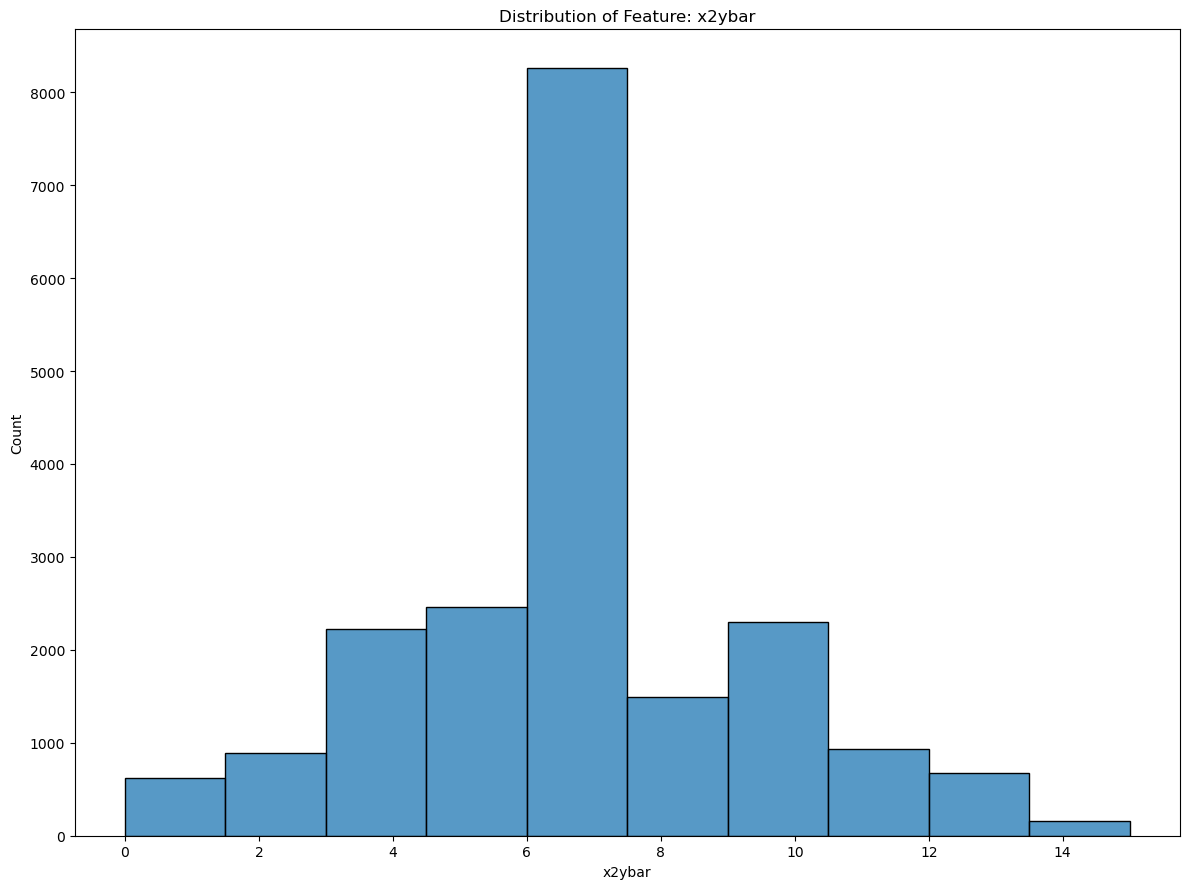

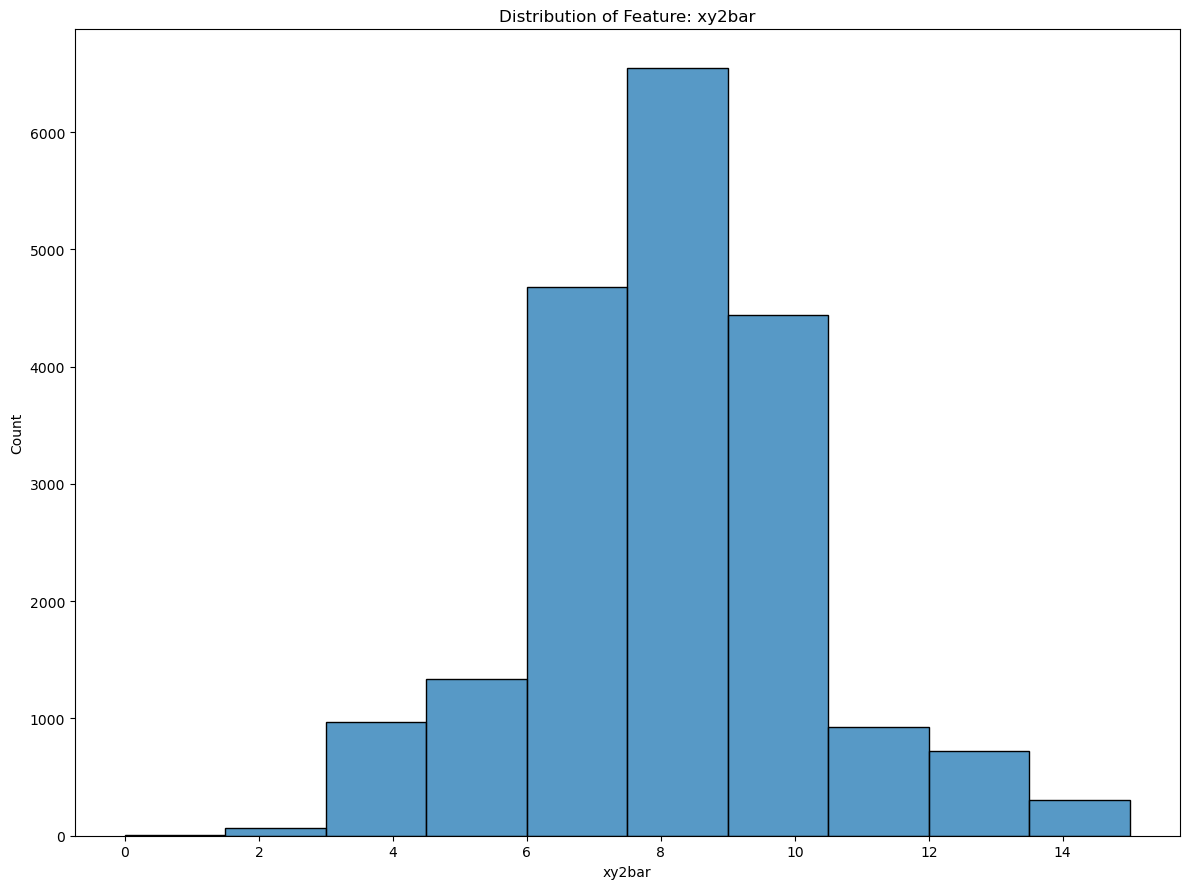

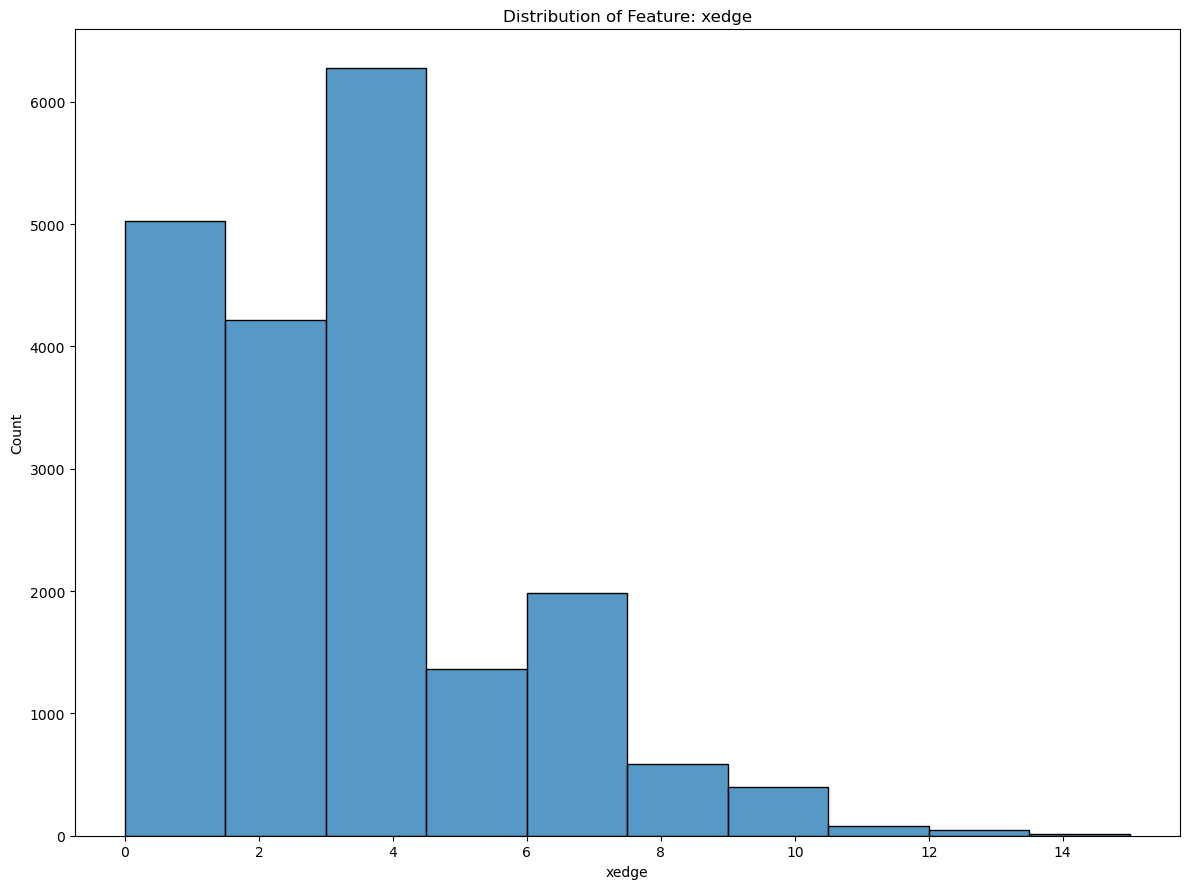

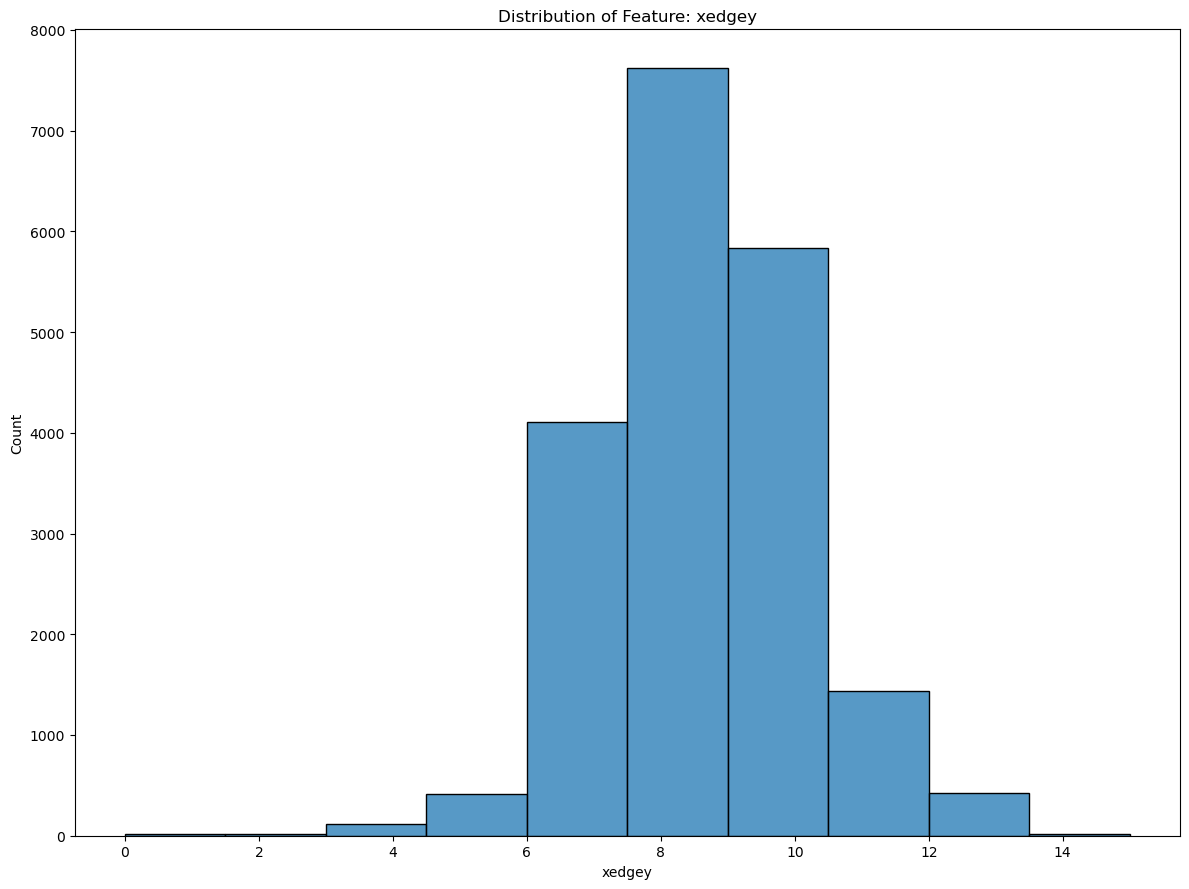

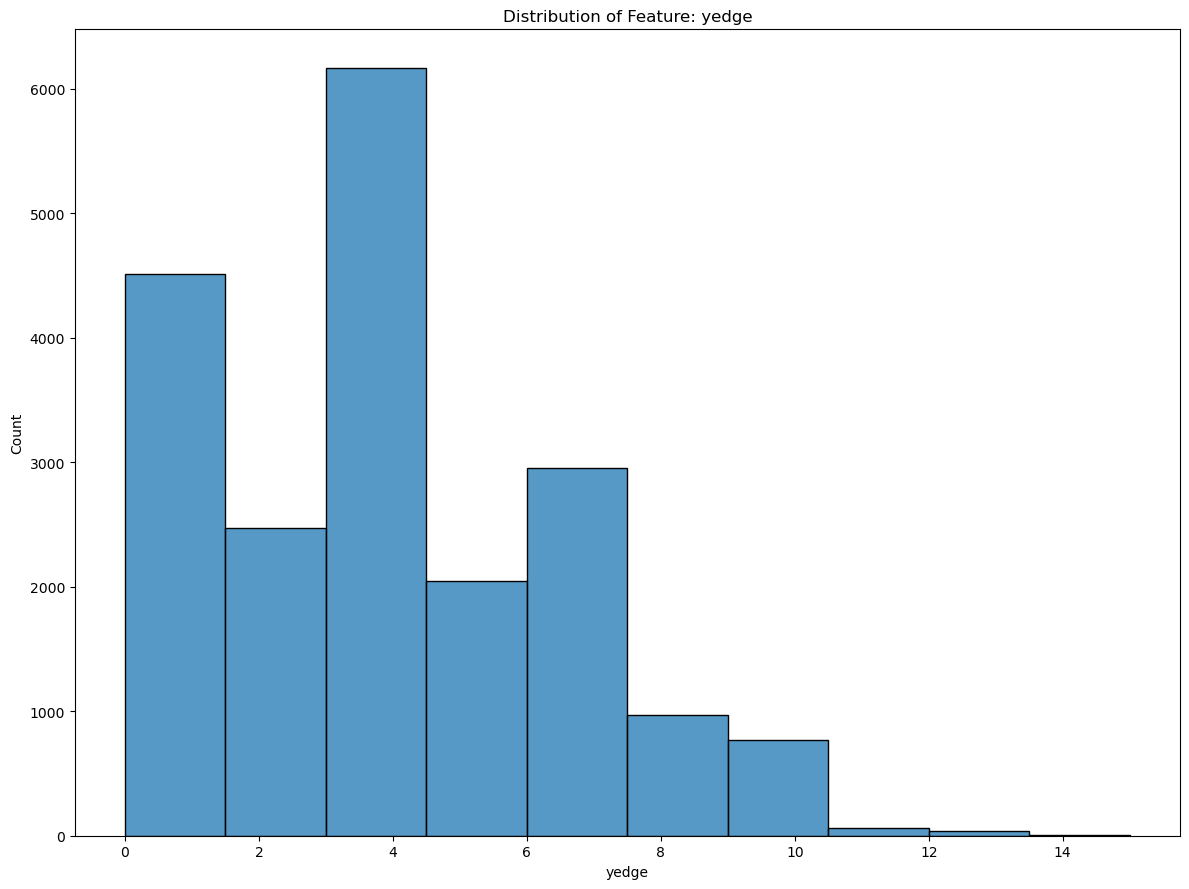

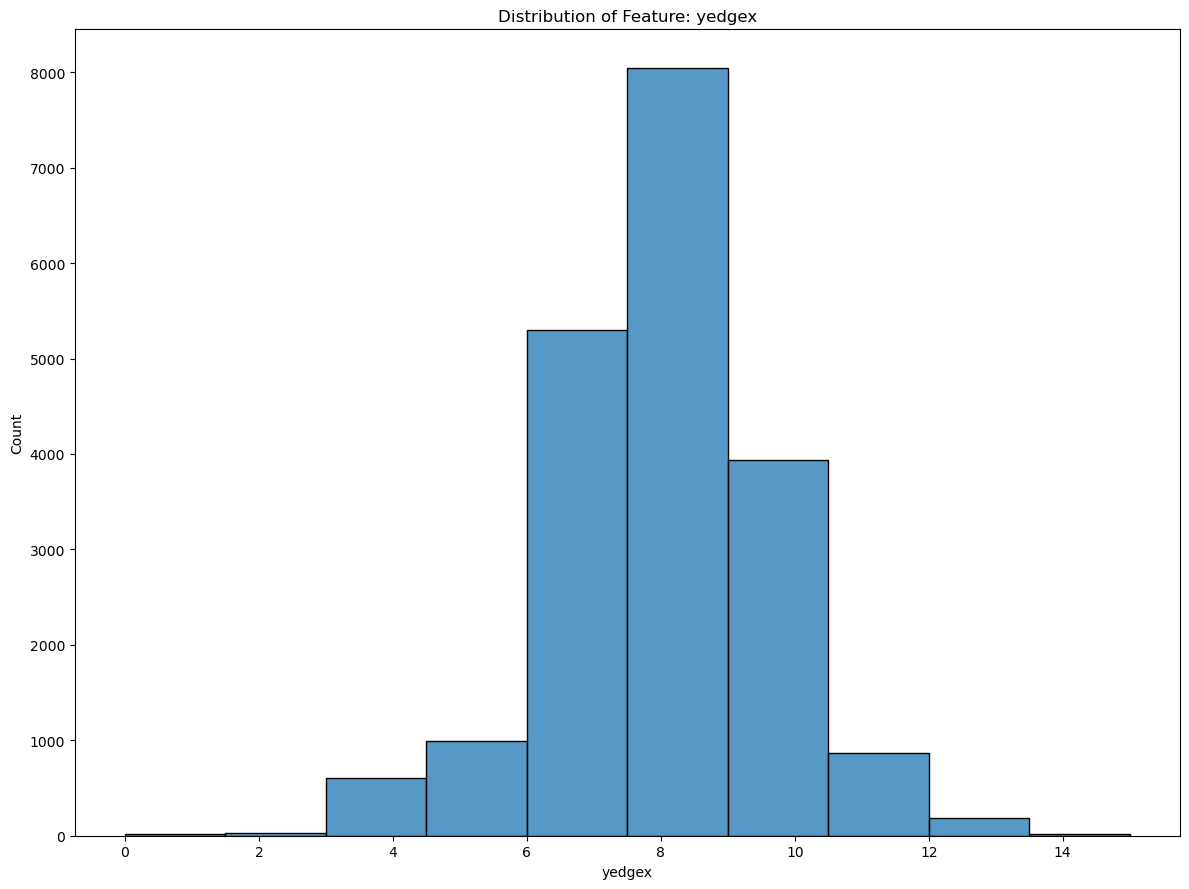

In [25]:
for col in X:
    plt.figure(figsize=(12,9))
    sns.histplot(X[col], bins=10)  # First feature after scaling
    plt.title(f'Distribution of Feature: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()    

# Model Implementation

### Build basic ANN model

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(units=26, activation='softmax'))  # 26 classes for letters A-Z

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile model

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train model

In [28]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.2856 - loss: 2.6769 - val_accuracy: 0.6422 - val_loss: 1.4252
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.6824 - loss: 1.2668 - val_accuracy: 0.7422 - val_loss: 1.0173
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.7533 - loss: 0.9339 - val_accuracy: 0.7719 - val_loss: 0.8531
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.7904 - loss: 0.7729 - val_accuracy: 0.7912 - val_loss: 0.7499
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.8071 - loss: 0.7019 - val_accuracy: 0.8125 - val_loss: 0.6776
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.8289 - loss: 0.6216 - val_accuracy: 0.8200 - val_loss: 0.6285
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.8396 - loss: 0.5797 - val_accuracy: 0.8375 - val_loss: 0.5764
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.8526 - loss: 0.5333 - 

### Evaluate on test set

In [29]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step


### Calculate metrics

In [30]:
accuracy_default = accuracy_score(y_test, y_pred)
precision_default = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall_default = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1_default = f1_score(y_test, y_pred, average='weighted', zero_division=0)

In [31]:
print("\nDefault ANN Performance (64 neurons, 1 layer, relu, lr=0.001):")
print(f"Accuracy: {accuracy_default:.2f}")
print(f"Precision: {precision_default:.2f}")
print(f"Recall: {recall_default:.2f}")
print(f"F1-Score: {f1_default:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Default ANN Performance (64 neurons, 1 layer, relu, lr=0.001):
Accuracy: 0.86
Precision: 0.87
Recall: 0.86
F1-Score: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       149
           1       0.79      0.86      0.82       153
           2       0.90      0.87      0.88       137
           3       0.84      0.88      0.86       156
           4       0.88      0.84      0.86       141
           5       0.80      0.87      0.84       140
           6       0.78      0.86      0.82       160
           7       0.79      0.67      0.72       144
           8       0.91      0.84      0.87       146
           9       0.90      0.90      0.90       149
          10       0.72      0.82      0.76       130
          11       0.95      0.90      0.93       155
          12       0.95      0.88      0.91       168
          13       0.94      0.87      0.90       151
          14       0.81      0.81      0.

### Plot training history

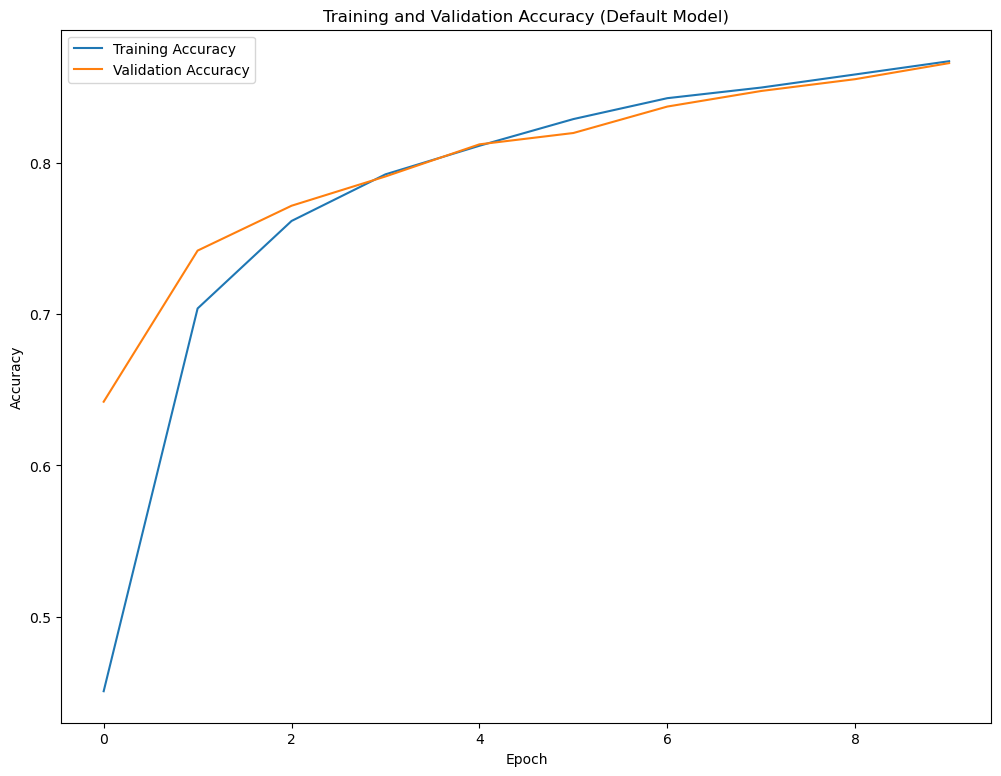

In [34]:
plt.figure(figsize=(12, 9))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Default Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Hyperparameter Tuning

### Initialize variables to track best model

In [35]:
best_accuracy = 0
best_params = {}
best_y_pred = None

### Test two simple combinations to keep it fast. Combination 1: 32 neurons, 1 layer, tanh, lr=0.01

In [36]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=32, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(units=26, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("\nTesting: neurons=32, layers=1, activation=tanh, lr=0.01")
print(f"Accuracy: {accuracy:.2f}")
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_params = {'neurons': 32, 'layers': 1, 'activation': 'tanh', 'lr': 0.01}
    best_y_pred = y_pred

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step

Testing: neurons=32, layers=1, activation=tanh, lr=0.01
Accuracy: 0.88


### Combination 2: 64 neurons, 2 layers, relu, lr=0.001

In [37]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=26, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("\nTesting: neurons=64, layers=2, activation=relu, lr=0.001")
print(f"Accuracy: {accuracy:.2f}")
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_params = {'neurons': 64, 'layers': 2, 'activation': 'relu', 'lr': 0.001}
    best_y_pred = y_pred

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step

Testing: neurons=64, layers=2, activation=relu, lr=0.001
Accuracy: 0.91


### Evaluate best model

In [38]:
precision_tuned = precision_score(y_test, best_y_pred, average='weighted', zero_division=0)
recall_tuned = recall_score(y_test, best_y_pred, average='weighted', zero_division=0)
f1_tuned = f1_score(y_test, best_y_pred, average='weighted', zero_division=0)

print("\nBest Tuned ANN Performance:")
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {best_accuracy:.2f}")
print(f"Precision: {precision_tuned:.2f}")
print(f"Recall: {recall_tuned:.2f}")
print(f"F1-Score: {f1_tuned:.2f}")
print("\nClassification Report:\n", classification_report(y_test, best_y_pred, zero_division=0))


Best Tuned ANN Performance:
Best Parameters: {'neurons': 64, 'layers': 2, 'activation': 'relu', 'lr': 0.001}
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1-Score: 0.91

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       149
           1       0.88      0.90      0.89       153
           2       0.97      0.88      0.92       137
           3       0.82      0.96      0.88       156
           4       0.90      0.85      0.88       141
           5       0.84      0.92      0.88       140
           6       0.88      0.90      0.89       160
           7       0.88      0.69      0.77       144
           8       0.92      0.88      0.90       146
           9       0.90      0.93      0.91       149
          10       0.86      0.83      0.84       130
          11       0.94      0.94      0.94       155
          12       0.99      0.86      0.92       168
          13       0.93      0.92      0.92      

# Evaluation

### Compare default and tuned models

In [39]:
print("\nModel Comparison:")
print(f"Default Model Accuracy: {accuracy_default:.2f}")
print(f"Tuned Model Accuracy: {best_accuracy:.2f}")
print(f"Accuracy Improvement: {(best_accuracy - accuracy_default):.2f}")


Model Comparison:
Default Model Accuracy: 0.86
Tuned Model Accuracy: 0.91
Accuracy Improvement: 0.04


* The default ANN used 1 hidden layer with 64 neurons, relu activation, and learning rate 0.001.
* Tuning tested two models: one with 32 neurons and tanh, another with 2 layers and relu.
* The best model improved accuracy by adjusting the number of neurons, layers, or activation.
* **Challenges:** Training multiple models takes time; more tests could find better results.
* **Practical Use:** This ANN can help recognize handwritten letters for apps like OCR.